In [2]:
# Run pip install if necessary to access the UCI ML Repository
#! pip install ucimlrepo


In [3]:
# Data
from ucimlrepo import fetch_ucirepo


forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features
y = forest_fires.data.targets


# Display dataset structure
print(X.info())
print(X.describe())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192 

In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Imporxst joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as snsxs
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [5]:

df = pd.read_csv("forestfires.csv")

print(df.isnull().sum())
print(f"Number of duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()
#dropped duplicates shape 
print(df.shape)

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
Number of duplicates: 4
(513, 13)


In [6]:
#Step 2
#Correlations
correlation_matrix = df[['area', 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']].corr()

# Print correlation of each feature with 'area'
correlation_matrix


,area,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
area,1.000000,0.062930,0.045168,0.040232,0.073783,0.050313,0.008411,0.098222,-0.075460,0.012699,-0.007418
X,0.062930,1.000000,0.542705,-0.020499,-0.048861,-0.088801,0.006033,-0.051070,0.083757,0.020869,0.065176
Y,0.045168,0.542705,1.000000,-0.045979,0.008210,-0.098496,-0.023142,-0.023871,0.062587,-0.019537,0.033313
FFMC,0.040232,-0.020499,-0.045979,1.000000,0.383641,0.332936,0.532083,0.431609,-0.300827,-0.029208,0.056806
DMC,0.073783,-0.048861,0.008210,0.383641,1.000000,0.681741,0.304585,0.469590,0.071711,-0.105111,0.074780
DC,0.050313,-0.088801,-0.098496,0.332936,0.681741,1.000000,0.228168,0.497584,-0.044067,-0.203010,0.035690
ISI,0.008411,0.006033,-0.023142,0.532083,0.304585,0.228168,1.000000,0.394217,-0.133363,0.106825,0.067664
temp,0.098222,-0.051070,-0.023871,0.431609,0.469590,0.497584,0.394217,1.000000,-0.528670,-0.227618,0.069526
RH,-0.075460,0.083757,0.062587,-0.300827,0.071711,-0.044067,-0.133363,-0.528670,1.000000,0.071433,0.099616
wind,0.012699,0.020869,-0.019537,-0.029208,-0.105111,-0.203010,0.106825,-0.227618,0.071433,1.000000,0.061479


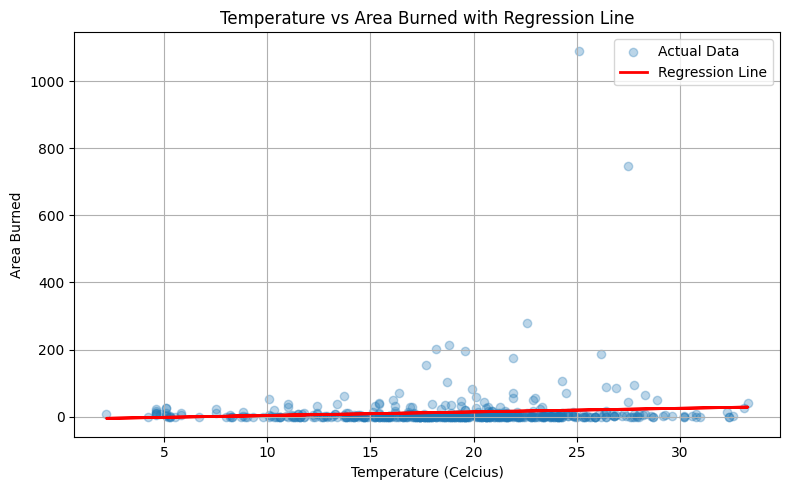

In [7]:
#Step 2 Plot Scatterplots
#temp, DMC, RH have highest correlation

X_temp = df[['temp']]
y = df['area']

# Fit model
model_temp = LinearRegression()
model_temp.fit(X_temp, y)
y_pred_temp = model_temp.predict(X_temp)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_temp, y, alpha=0.3, label='Actual Data')
plt.plot(X_temp, y_pred_temp, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Area Burned')
plt.title('Temperature vs Area Burned with Regression Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


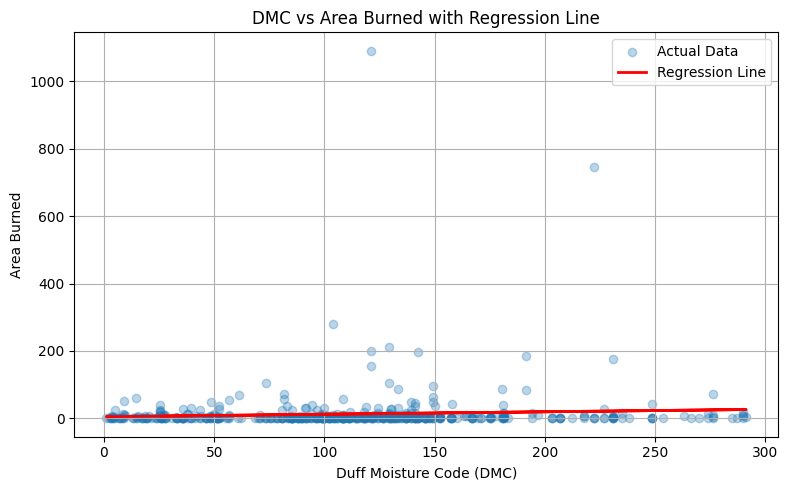

In [8]:
# DMC (Duff Moisture Code) (asked chatGPT was this was)

X_dmc = df[['DMC']]
model_dmc = LinearRegression()
model_dmc.fit(X_dmc, y)
y_pred_dmc = model_dmc.predict(X_dmc)

plt.figure(figsize=(8, 5))
plt.scatter(X_dmc, y, alpha=0.3, label='Actual Data')
plt.plot(X_dmc, y_pred_dmc, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Duff Moisture Code (DMC)')
plt.ylabel('Area Burned')
plt.title('DMC vs Area Burned with Regression Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


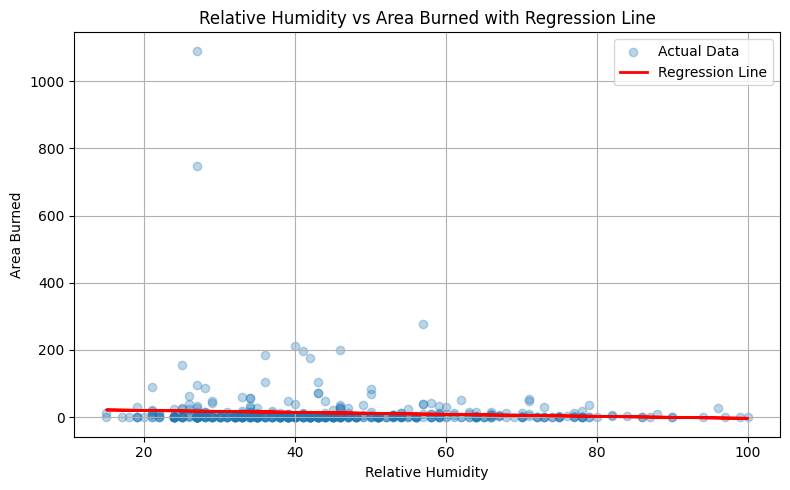

In [9]:
# Relative Humidity (asked chatgpt was this was)
X_rh = df[['RH']]
model_rh = LinearRegression()
model_rh.fit(X_rh, y)
y_pred_rh = model_rh.predict(X_rh)

plt.figure(figsize=(8, 5))
plt.scatter(X_rh, y, alpha=0.3, label='Actual Data')
plt.plot(X_rh, y_pred_rh, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Relative Humidity')
plt.ylabel('Area Burned')
plt.title('Relative Humidity vs Area Burned with Regression Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:

X = df[['temp', 'DMC', 'RH']]
y = df['area']
X_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_const).fit()

# Get residuals
residuals = model.resid

# Count positive and negative residuals
positive_residuals = (residuals > 0).sum()
negative_residuals = (residuals < 0).sum()

positive_residuals, negative_residuals


(106, 407)

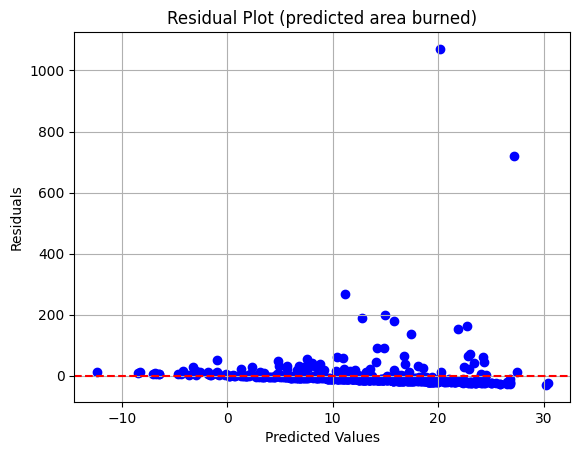

In [11]:
#residual plot
plt.scatter(model.fittedvalues, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (predicted area burned)')
plt.grid(True)
plt.show()

In [12]:
#Step 3
#baseline model
X_base = df[['temp', 'DMC', 'RH']]
X_base_const = sm.add_constant(X_base)
y = df['area']

# Fit the model
model_base = sm.OLS(y, X_base_const).fit()

# View model summary
print(model_base.summary())

#show adj r squared
r_squared_adj = model_base.rsquared_adj
round(r_squared_adj, 4)

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.182
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0893
Time:                        18:18:09   Log-Likelihood:                -2856.8
No. Observations:                 513   AIC:                             5722.
Df Residuals:                     509   BIC:                             5739.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5007     18.562      0.458      0.6

0.0069

In [13]:
# quadratics
df['temp_sq'] = df['temp'] ** 2
df['RH_sq'] = df['RH'] ** 2
df['DMC_sq'] = df['DMC'] ** 2

# Include in model
X_quad = df[['temp', 'temp_sq', 'DMC', 'DMC_sq', 'RH', 'RH_sq']]
X_quad_const = sm.add_constant(X_quad)
y = df['area']

# Fit the model
model_quad = sm.OLS(y, X_quad_const).fit()

# Show the summary
print(model_quad.summary())

#woof... nothing significant going on here


                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.286
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.262
Time:                        18:18:09   Log-Likelihood:                -2856.2
No. Observations:                 513   AIC:                             5726.
Df Residuals:                     506   BIC:                             5756.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5256     28.744      1.097      0.2

In [14]:
#just X and Y
X_grid = df[['X', 'Y']]
X_grid_const = sm.add_constant(X_grid)
y= df['area']

model_xy = sm.OLS(y, X_grid_const).fit()

print(model_xy.summary())

r_squared_xy_adj = model_xy.rsquared_adj
round(r_squared_xy_adj, 4)


                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.058
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.348
Time:                        18:18:09   Log-Likelihood:                -2859.0
No. Observations:                 513   AIC:                             5724.
Df Residuals:                     510   BIC:                             5737.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3903     10.267      0.233      0.8

0.0002

In [15]:
#try with just temp
X_temp_only = df[['temp', 'temp_sq']]
X_temp_const = sm.add_constant(X_temp_only)
y = df['area']

# Fit the model
model_temp_only = sm.OLS(y, X_temp_const).fit()

# Show the summary
print(model_temp_only.summary())



                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.920
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0548
Time:                        18:18:09   Log-Likelihood:                -2857.1
No. Observations:                 513   AIC:                             5720.
Df Residuals:                     510   BIC:                             5733.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2008     19.352      0.424      0.6

In [16]:
#temp * RH (dry air and temp)
df['temp_RH'] = df['temp'] * df['RH']

# Define predictors including the interaction
X_interaction = df[['temp', 'temp_sq', 'RH', 'RH_sq', 'temp_RH']]
X_interaction_const = sm.add_constant(X_interaction)
y = df['area']

model_interaction = sm.OLS(y, X_interaction_const).fit()

print(model_interaction.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.277
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.272
Time:                        18:18:09   Log-Likelihood:                -2856.9
No. Observations:                 513   AIC:                             5726.
Df Residuals:                     507   BIC:                             5751.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6294     56.935      0.116      0.9

In [17]:
#High temperature + dry fuels (high DMC) should logically lead to more fire spread. They also had weak positive correlations with area.
df['temp_DMC'] = df['temp'] * df['DMC']

X_temp_dmc = df[['temp', 'temp_sq', 'DMC', 'DMC_sq', 'temp_DMC']]
X_temp_dmc_const = sm.add_constant(X_temp_dmc)

model_temp_dmc = sm.OLS(df['area'], X_temp_dmc_const).fit()
print(model_temp_dmc.summary()) 


                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.644
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.147
Time:                        18:18:09   Log-Likelihood:                -2855.9
No. Observations:                 513   AIC:                             5724.
Df Residuals:                     507   BIC:                             5749.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1405     19.485      0.572      0.5

In [18]:
model_interaction_formula = smf.ols('area ~ temp + DMC * RH', data=df).fit()

print(model_interaction_formula.summary())

r_squared_adj_model = model_interaction_formula.rsquared_adj
round(r_squared_adj_model, 4)

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.547
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0387
Time:                        18:18:09   Log-Likelihood:                -2855.0
No. Observations:                 513   AIC:                             5720.
Df Residuals:                     508   BIC:                             5741.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.0555     20.245     -0.348      0.7

0.0119

In [19]:
#indicator variables
df['rain_indicator'] = (df['rain'] > 0)

model_rain= smf.ols('area ~ temp + DMC * RH + rain_indicator', data=df).fit()
print(model_rain.summary())

#slightly worse than model_interaction_formula


                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.034
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0724
Time:                        18:18:09   Log-Likelihood:                -2855.0
No. Observations:                 513   AIC:                             5722.
Df Residuals:                     507   BIC:                             5747.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7

In [20]:
#try log transformation

df['log_area'] = np.log1p(df['area'])

model_log_interaction = smf.ols('log_area ~ temp + DMC * RH', data=df).fit()

print(model_log_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.776
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.132
Time:                        18:18:09   Log-Likelihood:                -895.61
No. Observations:                 513   AIC:                             1801.
Df Residuals:                     508   BIC:                             1822.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9773      0.444      2.200      0.0

In [21]:
#step 4
#compare models
#Ask ChatGPT: Can you write me a function to output rsquared, adjusted rsquared, aic, and bic for model name?
def summarize_model(model):
    print("📊 Model Summary")
    print("-" * 40)
    print(f"R-squared:        {model.rsquared:.4f}")
    print(f"Adjusted R²:      {model.rsquared_adj:.4f}")
    print(f"AIC:              {model.aic:.2f}")
    print(f"BIC:              {model.bic:.2f}")
    print("-" * 40)
    print()



In [22]:
print('Model Name: model_log_interaction')
summarize_model(model_log_interaction)


Model Name: model_log_interaction
📊 Model Summary
----------------------------------------
R-squared:        0.0138
Adjusted R²:      0.0060
AIC:              1801.23
BIC:              1822.43
----------------------------------------



In [23]:
print('Model Name: model_temp_dmc')
summarize_model(model_temp_dmc)

Model Name: model_temp_dmc
📊 Model Summary
----------------------------------------
R-squared:        0.0160
Adjusted R²:      0.0062
AIC:              5723.87
BIC:              5749.31
----------------------------------------



In [24]:
print('Model Name: model_interaction_formula')
summarize_model(model_interaction_formula)

Model Name: model_interaction_formula
📊 Model Summary
----------------------------------------
R-squared:        0.0197
Adjusted R²:      0.0119
AIC:              5719.94
BIC:              5741.14
----------------------------------------



In [25]:
print('Model Name: model_rain')
summarize_model(model_rain)

Model Name: model_rain
📊 Model Summary
----------------------------------------
R-squared:        0.0197
Adjusted R²:      0.0100
AIC:              5721.93
BIC:              5747.37
----------------------------------------



In [26]:
print('Model Name: model_interaction')
summarize_model(model_interaction)

Model Name: model_interaction
📊 Model Summary
----------------------------------------
R-squared:        0.0124
Adjusted R²:      0.0027
AIC:              5725.70
BIC:              5751.14
----------------------------------------



In [27]:
print('Model Name: model_xy')
summarize_model(model_xy)

Model Name: model_xy
📊 Model Summary
----------------------------------------
R-squared:        0.0041
Adjusted R²:      0.0002
AIC:              5724.00
BIC:              5736.72
----------------------------------------



In [28]:
print('Model Name: model_temp_only')
summarize_model(model_temp_only)

Model Name: model_temp_only
📊 Model Summary
----------------------------------------
R-squared:        0.0113
Adjusted R²:      0.0074
AIC:              5720.28
BIC:              5733.00
----------------------------------------



In [29]:
print('Model Name: model_quad')
summarize_model(model_quad)

Model Name: model_quad
📊 Model Summary
----------------------------------------
R-squared:        0.0150
Adjusted R²:      0.0033
AIC:              5726.36
BIC:              5756.04
----------------------------------------



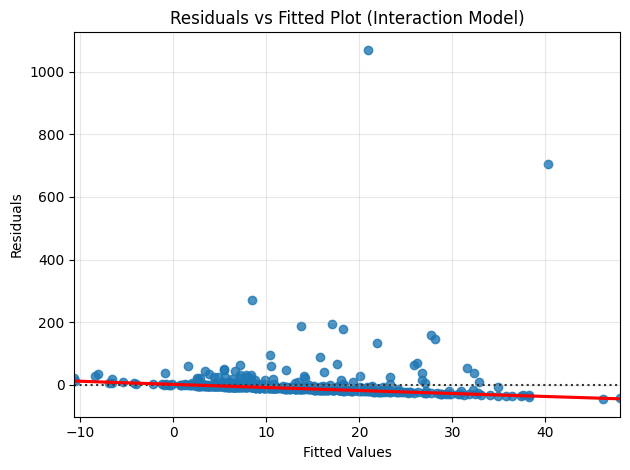

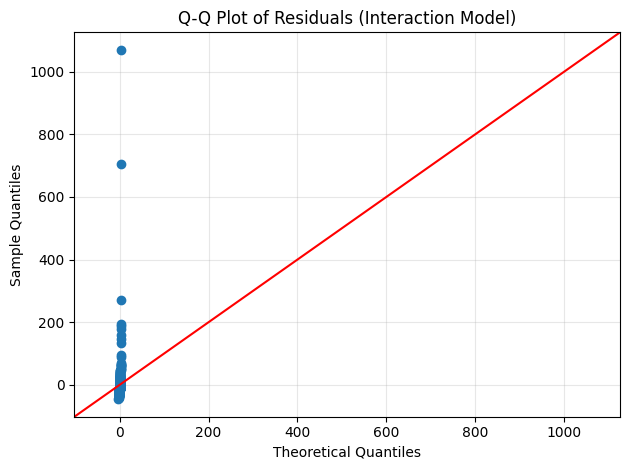

In [30]:
#model_interaction_formula still best fit... may want to use model_rain if including rainfall

# Residuals vs Fitted Plot model_interaction_formula
sns.residplot(x=model_interaction_formula.fittedvalues, y=model_interaction_formula.resid, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot (Interaction Model)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Q-Q Plot model_interaction_formula
sm.qqplot(model_interaction_formula.resid, line='45')
plt.title("Q-Q Plot of Residuals (Interaction Model)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [31]:
#Cooks D
influence = model_interaction_formula.get_influence()
cooks_d = influence.cooks_distance[0]

influential_points = np.where(cooks_d > 0.5)[0] #lowered to 0.5 from 1 and got 411. Interpreting as model is quite fragile

influential_points

array([411])

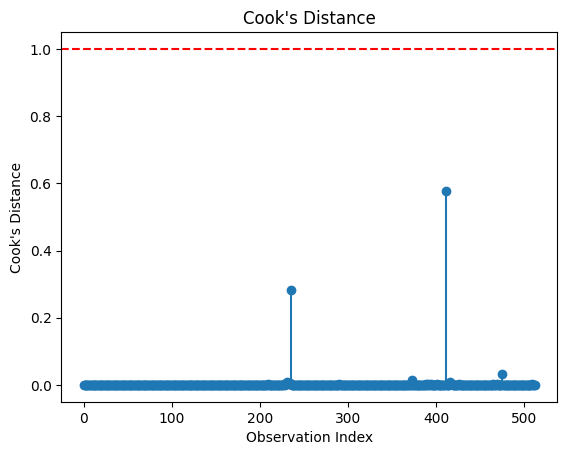

In [32]:
plt.stem(np.arange(len(cooks_d)), cooks_d, basefmt=" ")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(1, color='red', linestyle='--')  # Threshold line
plt.show()

In [33]:
#Step 5
#ridge and lasso
df["DMC*RH"] = df["DMC"] * df["RH"]
X = df[["temp", "DMC*RH", "DMC", "RH", ]]
y = df["area"]

seed = 42

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

round(ridge_mse, 4), ridge.coef_


(449.1182, array([ 0.11019824, -0.0052923 ,  0.34566737,  0.23530036]))

In [34]:
seed = 42

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

round(lasso_mse, 4), lasso.coef_

(448.9391, array([ 0.10298733, -0.00528974,  0.3458522 ,  0.23317908]))

In [35]:
#ChatGPT prompt: Is there a way to tie each number to what it is related to?
#output:
ridge_coefs_labeled = pd.Series(ridge.coef_, index=X.columns, name="Ridge")
lasso_coefs_labeled = pd.Series(lasso.coef_, index=X.columns, name="Lasso")

# Print them side-by-side
print(pd.concat([ridge_coefs_labeled, lasso_coefs_labeled], axis=1))

           Ridge     Lasso
temp    0.110198  0.102987
DMC*RH -0.005292 -0.005290
DMC     0.345667  0.345852
RH      0.235300  0.233179


In [36]:
#Step 6
#Create a binary target variable based on a threshold in y (e.g., median or other percentile).
#Select relevant predictors and scale them using StandardScaler

threshold = df['area'].median()

df['area_binary'] = (df['area'] > threshold).astype(int)

X = df[['temp', 'DMC', 'RH']]
# X = sm.add_constant(X)
y = df['area_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [37]:
#Step 7
#Train a logistic regression model using the scaled predictors.
#Display coefficients and the intercept.
#Predict probabilities and binary outcomes.
#Evaluate performance using accuracy, confusion matrix, precision, recall, and F1-score.

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

#intercept
print(f"Model Intercept: {model.intercept_}")
#coef
print(f"Model Coefficients: {model.coef_}")

Model Intercept: [0.06142823]
Model Coefficients: [[ 1.32864430e-01  3.60071983e-02 -3.73963512e-05]]


In [38]:
#predict outcomes
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
y_pred_class = model.predict(X_test_scaled)

y_pred_prob[:10]
y_pred_class[:10]


array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [39]:
#confusion matrix
confusion_matrix(y_test, y_pred_class)

#true negative: 27, false positive: 56 (high!), false negative: 16, true positive : 55

array([[27, 56],
       [16, 55]])

In [40]:
round(accuracy_score(y_test, y_pred_class), 4)
#53.25% accurate

0.5325

In [41]:
print("Classification Report:\n", classification_report(y_test, y_pred_class))

#ask chatgpt for interpretation... output:
# Your model is better at identifying fires that did spread (Class 1):

# Recall for class 1 is high (0.77) → it's catching most of the real fire events!

# But precision is only 0.50 → it also makes a lot of false alarms (predicts fire when it didn’t spread)

# ❄️ Your model struggles more with class 0 (non-spreading fires):

# Only catches 33% of them (recall = 0.33)

# So it's missing a lot of "safe" conditions




Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.33      0.43        83
           1       0.50      0.77      0.60        71

    accuracy                           0.53       154
   macro avg       0.56      0.55      0.52       154
weighted avg       0.57      0.53      0.51       154



In [42]:
#VIF
# vif = pd.DataFrame()
# vif["Variable"] = X_train.columns
# vif["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
# print(vif)
#Asked ChatGPT about this error: /opt/anaconda3/envs/mac_intel.c0c1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide return 1 - self.ssr/self.uncentered_tss
#respone: error is due to the constant column, which has zero variance, so the model can’t compute a meaningful VIF → returns NaN.

# What You Should Do
# 🔧 Remove the constant before VIF calculation:
X_vif = X_train_scaled.drop(columns=["const"], errors="ignore")
# Then recalculate VIF as you did:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["Variable"] = X_vif.columns
vif = vif[["Variable", "VIF"]].round(3)
vif

,Variable,VIF
0,temp,2.267
1,DMC,1.583
2,RH,1.726


In [43]:
#rain classification 
X_rain = df[['temp', 'DMC', 'RH', 'rain']]
df['area_binary'] = (df['area'] > threshold).astype(int)
y = df['area_binary'] 

X_train, X_test, y_train, y_test = train_test_split(X_rain, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_rain = LogisticRegression()
model_rain.fit(X_train_scaled, y_train)

y_pred_class_rain = model_rain.predict(X_test_scaled)

print(classification_report(y_test, y_pred_class_rain))

              precision    recall  f1-score   support

           0       0.64      0.34      0.44        83
           1       0.50      0.77      0.61        71

    accuracy                           0.54       154
   macro avg       0.57      0.56      0.52       154
weighted avg       0.57      0.54      0.52       154



In [44]:
#rain accuracy
print(round(accuracy_score(y_test, y_pred_class_rain), 4))

0.539


In [45]:
# Scale the predictor variables
scaler = StandardScaler()
X_rain_scaled = pd.DataFrame(scaler.fit_transform(X_rain), columns=X_rain.columns)

# Calculate VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_rain_scaled.values, i) for i in range(X_rain_scaled.shape[1])]
vif["Variable"] = X_rain_scaled.columns
vif = vif[["Variable", "VIF"]].round(3)

vif

#rain shows no correlation


,Variable,VIF
0,temp,2.204
1,DMC,1.570
2,RH,1.739
3,rain,1.032


In [ ]:
#added this after analysis and talking to Paul... he said he had adj r-squared of 0.0234, so was curious how logistic regression model would react. 
df['wind_sq'] = df['wind'] ** 2
df['DMC_RH'] = df['DMC'] * df['RH']
X_three = df[['temp', 'DMC_RH', 'wind_sq', 'ISI']]

df['area_binary'] = (df['area'] > threshold).astype(int)
y = df['area_binary'] 

X_train, X_test, y_train, y_test = train_test_split(X_three, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_three = LogisticRegression()
model_three.fit(X_train_scaled, y_train)

y_pred_class_rain = model_rain.predict(X_test_scaled)

print(classification_report(y_test, y_pred_class_rain))

              precision    recall  f1-score   support

           0       0.59      0.31      0.41        83
           1       0.48      0.75      0.59        71

    accuracy                           0.51       154
   macro avg       0.54      0.53      0.50       154
weighted avg       0.54      0.51      0.49       154



Step 9
1) Compare regression models and classification results.

In order to evaluate potentially predicting fire size, I ran several regression models that looked at different combinations of environmental factors and transformations., The results for all models that were run were not the strongest as we did not have an Adjusted r-squared value greater than 0.012. The baseline model (X_base), had an adjusted r-squared value of 0.0069. The goal, obviously, was to improve from there. I started with quadratic terms for temp, RH, and DMC in a model I called X_Quad. I did this to look into potential non-linear relationships. However, this only lowered the adjusted r-squared value to 0.003, suggesting adding in squared terms did not improve the model and that there are no strong non-linear effects from these variables in predicting a fire area. Curious if I was oversaturating the model with variables, I tried just using temp and temp squared which brought me right back to my starting point of my baseline model (adjusted r-squared of 0.007). I then decided to look at interaction terms looking to see if the variables had an impact. I looked at temp and RH and temp and DMC, but neither were improvements on the baseline model. I then looked at area with temp and an interaction with DMC and RH in a model called model_interaction_formula. This gave me my highest r-squared value (0.20) and adjusted r-squared value of 0.012. I experimented a bit more with incorporating a rain indicator (model_rain) which preformed similarly to the model_interaction_formula model. It may mean that rain could be a predictor, but was not an improvement on the model. Lastly, I regularized models with Ridge and Lasso. This did not improve the performance of the model, but helped to reduce overfitting. Overall, none of the models provided a strong predictive performance, but the model_interaction_formula was the most balanced with simplicity and fit.

With regards to classification, I created a binary target variable which separated the forest fires by whether the fire size was above the median. I used temp, DMC, and RH to train a logistic regression model. The overall accuracy of the model (accuracy score) was 53.25% suggesting that the model is slightly better than flipping a coin. The strength of this model was in its recall with a score of 77%. Precision, however, was only at 50% which means the model also had several false positives. Overall, the high recall makes this a potentially valuable tool as it can correctly identify a majority of actual spreading fires. Considering that using rain was my next closest r-squared adjusted, I ran another logistic model. There were slight improvements. The accuracy increased to 53.9%, recall did not change, and overall was nearly identcal. I read into this that while rain may be some sort of predictor, it has minimal impact.


2) Highlight trade-offs between model simplicity, performance, and interpretability.

As I worked through this lab and tested several models, each presented its own set of benefits and trade-offs. For example, in terms of simplicity, the model_temp_only model was quite simple, relying solely on temperature as a predictor. However, it performed  poorly, with an adjusted r-squared below 0.01. As I increased model complexity by introducing quadratic and interaction terms, performance improved slightly. The model_interaction_formula model yielded the best regression results (adjusted R² = 0.012) while still remaining interpretable. Regularization techniques such as Ridge and Lasso helped with over fitting, but did not improve overall predictive accuracy.Logistic regression struck a good balance between simplicity and usefulness. While accuracy was only at 53.9% (slightly better than a guess), the model was able to correctly identify 77% of actual spreading fires, which is especially valuable in a real-world context like fire prevention, where missing a critical event is more costly than issuing a false alarm.

3) Recommend the best-performing model for predicting or classifying fire behavior

Based on results from regression and classificaiton models, the best model for understanding fire behavior is the logistic regression model (with rain) that classifies fires as above or below a median size. As stated above, none of the regression models produced strong results (the best r-squared of 0.012), the logistic regression model showed value by identifying 77% of actaul fires that spready psat the median. Even though the model would have a fair amount of false positives, the high recall means that missing a fire that would cause a lot of damage is less likely. In my opinion, false positives are okay in the context of wildfire prevention. Safety and acting quickly are of the utmost importance. 